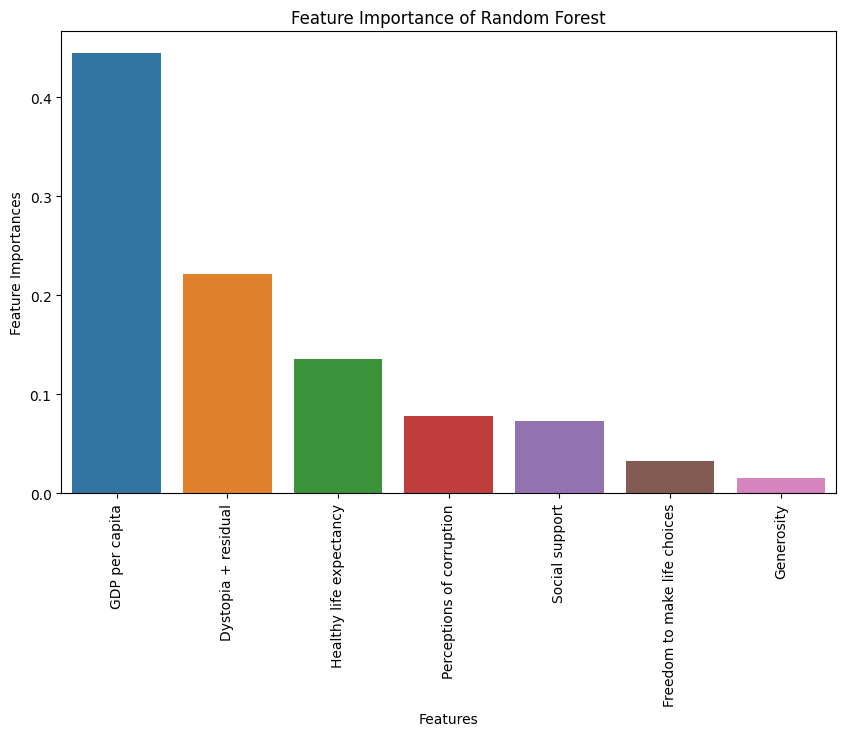

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 특성 데이터와 타겟 변수 데이터를 준비합니다.
data = pd.read_excel('happiness_world.xlsx')  # 데이터 파일명에 맞게 수정하세요
data = data.dropna()
X = data[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual']]
y = data['Score']

# 랜덤 포레스트 모델을 생성하고 학습합니다.
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# 피쳐 중요도를 추출합니다.
feature_importances = rf.feature_importances_

# 피쳐 중요도를 데이터프레임으로 변환합니다.
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# 피쳐 중요도를 시각화합니다.
plt.figure(figsize=(10,6))
sns.barplot(x='Feature', y='Importance', data=importance_df)
plt.ylabel('Feature Importances')
plt.xlabel('Features')
plt.title('Feature Importance of Random Forest')
plt.xticks(rotation=90)  # X축에 피쳐 이름을 표시하며, 이름이 길 경우 겹치지 않도록 90도 회전시킵니다.
plt.show()

In [5]:
# 학습용과 테스트용 데이터로 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델을 생성하고 학습합니다.
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측값을 생성합니다.
y_pred = rf.predict(X_test)

# MSE를 계산합니다.
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.03740284367263425
